1-Load the Data: Load your dataset into a suitable data structure (e.g., pandas DataFrame).
2-Understand the Data: Familiarize yourself with the dataset's features, including their names, data types, and descriptions.
3-Handle Missing Values: Check for missing values in the dataset and decide how to handle them (e.g., imputation, removal, or flagging).
4-Split the Data: Split the dataset into training, validation, and test sets. The training set is used to train your model, the validation set is used to tune hyperparameters and   evaluate model performance during training, and the test set is used to evaluate the final model performance.

5-Data Preprocessing:
    Convert Categorical Variables: Convert categorical variables into a suitable numerical representation using techniques like one-hot encoding or label encoding.
    Normalize/Standardize Numeric Variables: Scale numeric features to a similar range to prevent features with large values from dominating the learning process.
    Feature Engineering: Create new features or transform existing features to improve model performance.
6-Model Selection: Choose the appropriate machine learning algorithm(s) based on the problem at hand, data characteristics, and desired outcomes.
7-Train the Model: Train your selected machine learning model(s) using the training data.
8-Evaluate the Model: Evaluate the trained model(s) using the validation set to assess performance and make any necessary adjustments (e.g., hyperparameter tuning).
9-Final Model Evaluation: Once satisfied with the model performance on the validation set, evaluate the final model on the test set to obtain an unbiased estimate of its performance.
10- Interpret Results: Interpret the model's predictions and insights gained from the analysis to derive actionable conclusions.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to check for missing values in any column
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found in the dataset.")
    else:
        print("Missing Values:")
        print(missing_values)

# Load the dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
display(data.head().T)
#data.info()
data.describe()
data.describe(include='O').T

# Check for missing values
check_missing_values(data)

# Calculate percentage of churn customers
churn_percentage = (data['Churn'].value_counts(normalize=True) * 100).round(2)
print("\nPercentage of Churn Customers:")
print(churn_percentage)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


No missing values found in the dataset.

Percentage of Churn Customers:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


In [76]:
boolean_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
    
# Loop through each row in the DataFrame
# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Loop through each column
    for col in boolean_columns:
        # Check if the value is 'No internet service' or 'No phone service'
        if row[col] == 'No internet service' or row[col] == 'No phone service':
            # Replace with 'No'
            data.at[index, col] = 'No'

            
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


c:\Users\pc\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


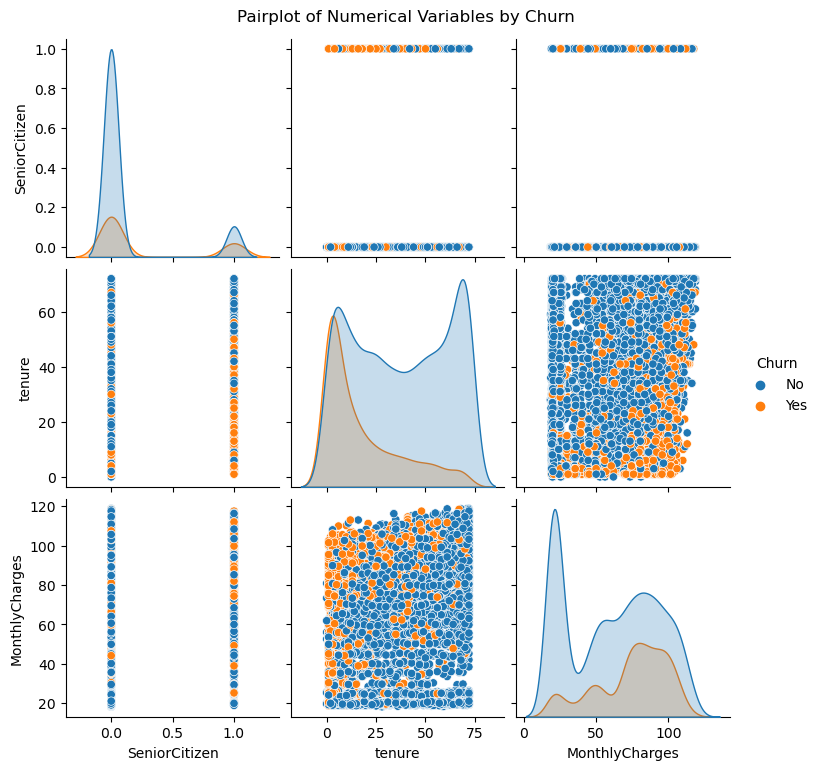

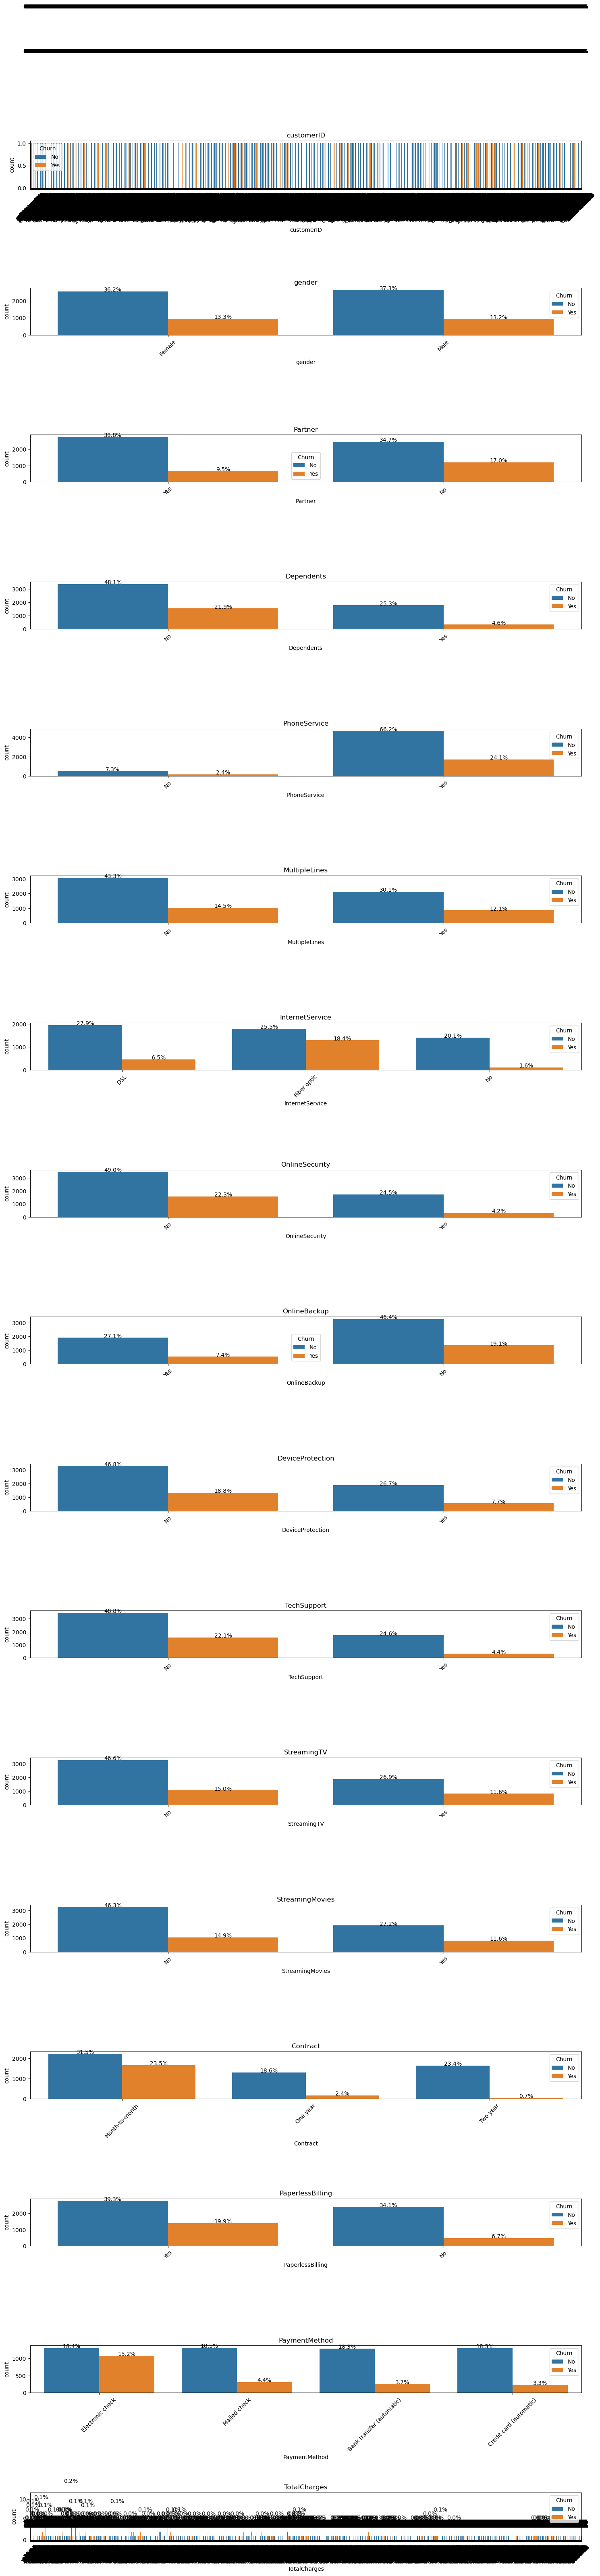

In [77]:
# Explore the data with visualizations
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data, hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Churn', y=1.02)
plt.show()

# Countplot for categorical variables with Churn
cat_columns = [col for col in data.columns if data[col].dtype == 'object' and col != 'Churn']
num_plots = len(cat_columns)
plt.figure(figsize=(15, 4 * num_plots))
for i, col in enumerate(cat_columns):
    plt.subplot(num_plots, 1, i + 1)
    sns.countplot(data=data, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(col)
    
    # Add percentage text annotations
    total = len(data[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + 3, '{:.1f}%'.format((height / total) * 100), 
                       ha='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()




In [68]:
from sklearn.model_selection import train_test_split

def perform_train_validation_test_split(data, target_column, validation_size=0.2, test_size=0.2, random_state=None):
    """
    Perform train-validation-test split on the dataset after dropping the 'customerID' column.
    
    Parameters:
    - data: DataFrame, the dataset to split.
    - target_column: str, the name of the target column.
    - validation_size: float, optional, the proportion of the dataset to include in the validation split (default is 0.2).
    - test_size: float, optional, the proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int or None, optional, seed for random number generator (default is None).
    
    Returns:
    - X_train: DataFrame, the training features.
    - X_val: DataFrame, the validation features.
    - X_test: DataFrame, the test features.
    - y_train: Series, the training target.
    - y_val: Series, the validation target.
    - y_test: Series, the test target.
    """
    # Drop 'customerID' column
    data = data.drop(columns=['customerID'])
    
    # Separate features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(validation_size + test_size), random_state=random_state)
    
    # Adjust sizes for validation and test sets
    test_ratio = test_size / (validation_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio, random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [21]:
# Assuming data is your DataFrame and 'Churn' is your target column
X_train, X_val, X_test, y_train, y_val, y_test = perform_train_validation_test_split(data, target_column='Churn', validation_size=0.2, test_size=0.2, random_state=42)
display(X_train.head())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
999,Male,0,No,No,2,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,70.30,132.4
389,Male,0,No,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44
2330,Male,0,Yes,Yes,28,Yes,Yes,DSL,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,64.40,1802.15
1476,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,36.8
2240,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.55,6448.85


Data preprocessing

In [61]:
data_original=data

    
    


In [69]:
import pandas as pd

def preprocess_data(data):
    # Convert boolean columns to boolean dtype
    
    data[boolean_columns] = data[boolean_columns].replace({'Yes': True, 'No': False})
    
    # Convert numerical columns to numeric data type
    numeric_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Perform one-hot encoding for categorical columns
    categorical_columns = ['PaymentMethod', 'Contract', 'InternetService']
    data = pd.get_dummies(data, columns=categorical_columns)
    
    return data

# Assuming 'data' is your DataFrame
processed_data = preprocess_data(X_train)
display(processed_data.head())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
999,Male,0,False,False,2,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
389,Male,0,False,True,1,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
2330,Male,0,True,True,28,True,True,False,True,False,...,False,False,True,False,True,False,False,True,False,False
1476,Male,0,False,False,2,True,False,No internet service,No internet service,No internet service,...,False,False,False,True,True,False,False,False,False,True
2240,Female,1,True,True,72,True,True,True,True,True,...,False,True,False,False,False,False,True,True,False,False
